# Sympy quick guide

###### Numerical Python, Robert Johnsson

In [1]:
import numpy as np
import sympy
import sympy as sp
sp.init_printing()
from sympy import I,pi,oo

In [2]:
sp.pi

In [3]:
x = sp.Symbol("x")
y = sp.Symbol("y",real=True)
print "y is real? ",y.is_real
print "z is real? ",sp.Symbol("z",imaginary=True).is_real

y is real?  True
z is real?  False


In [4]:
sp.sqrt(x**2)

In [5]:
n1 = sp.Symbol("n")
n2 = sp.Symbol("n",integer=True)
n3 = sp.Symbol("n",odd=True)
print sp.cos(n1*pi)
print sp.cos(n2*pi)
print sp.cos(n3*pi)

cos(pi*n)
(-1)**n
-1


In [6]:
a,b,c = sp.symbols("a,b,c",negative=True)
d,e,f = sp.symbols("d,e,f",positive=True)

In [7]:
a,b,c

## Numbers

In [8]:
i = sp.Integer(19)
type(i)
print i.is_real,i.is_integer,i.is_odd

True True True


In [10]:
f=sp.Float(2.3)
print type(f)
print i.is_real,i.is_integer,i.is_odd

<class 'sympy.core.numbers.Float'>
True True True


Or

In [12]:
i, f = sp.sympify(19), sp.sympify(2.3)
print  type(i), type(f)

<class 'sympy.core.numbers.Integer'> <class 'sympy.core.numbers.Float'>


In [13]:
print i**3
print sp.factorial(100)

6859
93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


#### The SymPy Float object can represent the real number 0.3 without the limitations of floating-point numbers

In [16]:
print "%.25f" % 0.3 
print sp.Float(0.3, 25)
print sp.Float('0.3', 25)

0.2999999999999999888977698
0.2999999999999999888977698
0.3000000000000000000000000


In [17]:
print sympy.Rational(11, 13)
r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)
print r1 * r2
print r1/r2

11/13
8/15
5/6


Constants and Special Symbols

In [18]:
print sympy.pi, sympy.E, sympy.EulerGamma,sympy.I, sympy.oo

pi E EulerGamma I oo


## Functions

In [19]:
f = sympy.Function("f")
type(f)

sympy.core.function.UndefinedFunction

In [20]:
x, y, z = sympy.symbols("x, y, z")
g = sympy.Function("g")(x, y, z)
g

In [21]:
sympy.sin(pi * 1.5)

In [22]:
n = sympy.Symbol("n", integer=True)
sympy.sin(pi * n)

Lambda functions

In [23]:
h = sympy.Lambda(x, x**2)
h

In [24]:
h(5)

In [25]:
h(1 + x)

In [26]:
x = sympy.Symbol("x")
expr = 1 + 2 * x**2 + 3 * x**3
expr

In [27]:
expr.args

Manipulating Expressions

In [28]:
expr = 2 * (x**2 - x) - x * (x + 1)
expr

In [29]:
sympy.simplify(expr)

In [30]:
expr = 2 * sympy.cos(x) * sympy.sin(x)
expr

In [31]:
sympy.simplify(expr)

In [32]:
a, b = sympy.symbols("a, b", positive=True)
sympy.log(a * b).expand(log=True)

In [33]:
sympy.exp(I*a + b).expand(complex=True)

In [34]:
sympy.expand((a * b)**x, power_base=True)

In [35]:
sympy.exp((a-b)*x).expand(power_exp=True)

### Apart,Together and Cancel

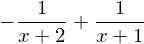

In [36]:
sympy.apart(1/(x**2 + 3*x + 2), x)

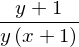

In [37]:
sympy.together(1 / (y * x + y) + 1 / (1+x))

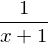

In [38]:
sympy.cancel(y / (y * x + y))

Substitutions, is to be replaced (x) is given as first argument, and the new symbol or the expression (y) is given as second
argument.

In [39]:
(x + y).subs(x, y)

In [40]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

In [41]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

# Numerical Evaluation

In [42]:
sympy.N(1 + pi)

#### Both sympy.N and the evalf method take an optional argument that specifies the number of significant digits to which the expression is to be evaluated

In [43]:
sympy.N(pi, 50)

In [44]:
(x + 1/pi).evalf(10)

In [45]:
x = sp.Symbol('x')
expr = sympy.sin(pi * x * sympy.exp(x))

#### When we need to evaluate an expression numerically for a range of input values

In [46]:
[expr.subs(x, xx).evalf(3) for xx in range(0, 9)]

#### sympy.lambdify is more efficient

In [47]:
from sympy import lambdify
expr_func = lambdify(x, expr)
expr_func(1.0)

#### vectorized version

In [48]:
expr_func = sympy.lambdify(x, expr, 'numpy')
import numpy as np
xvalues = np.arange(0, 10)
expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

## Calculus

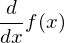

In [49]:
f = sympy.Function('f')(x)
sympy.diff(f, x)         ## equivalent to f.diff(x)

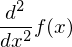

In [50]:
sympy.diff(f, x, x)

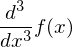

In [51]:
sympy.diff(f, x, 3)       # equivalent to sympy.diff(f, x, x, x)

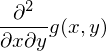

In [52]:
g = sympy.Function('g')(x, y)
g.diff(x, y)
# equivalent to sympy.diff(g, x, y)

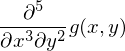

In [53]:
g.diff(x, 3, y, 2)           # equivalent to sympy.diff(g, x, x, x, y, y)

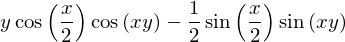

In [54]:
expr = sympy.sin(x*y)*sympy.cos(x/2)
expr.diff(x)

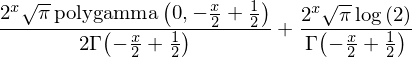

In [55]:
expr = sympy.special.polynomials.hermite(x,0)
expr.diff(x).doit()

###### DOIT Evaluate objects that are not evaluated by default like limits, integrals, sums and products.

In [57]:
from sympy import  Integral
x = sympy.Symbol("x")

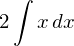

In [58]:
2*Integral(x,x)

In [59]:
(2*Integral(x,x)).doit()

In [60]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)

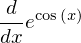

In [61]:
d

In [62]:
d.doit()

## Integrals

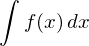

In [63]:
a, b, x, y = sympy.symbols("a, b, x, y")
f=sympy.Function("f")(x)
sympy.integrate(f)

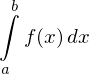

In [64]:
sympy.integrate(f,(x,a,b))

In [65]:
sympy.integrate(sympy.sin(x))

In [66]:
sympy.integrate(sympy.sin(x),(x,a,b))

In [67]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

In [69]:
a, b, c = sympy.symbols("a, b, c", positive=True)
sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -oo, oo))

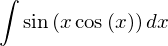

In [70]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

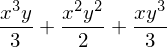

In [71]:
expr = (x + y)**2
sympy.integrate(expr, x, y)

In [72]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

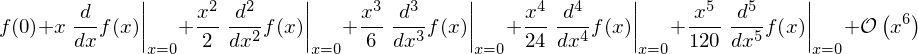

In [73]:
x = sympy.Symbol("x")
f = sympy.Function("f")(x)
sympy.series(f, x)

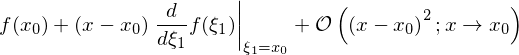

In [74]:
x0 = sympy.Symbol("{x_0}")
f.series(x, x0, n = 2)

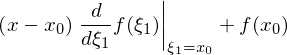

In [75]:
f.series(x, x0, n = 2).removeO()

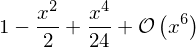

In [76]:
sympy.cos(x).series()

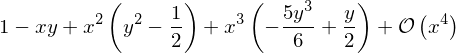

In [77]:
expr = sympy.cos(x) / (1 + sympy.sin(x * y))
expr.series(x, n = 4)

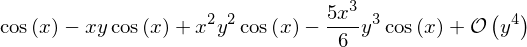

In [78]:
expr.series(y, n = 4)

#### Limits, Sums and Products

### Equations

In [79]:
x = sympy.Symbol("x")
sympy.solve(x**2 + 2*x - 3)

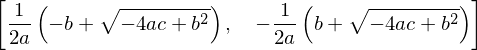

In [80]:
a, b, c = sympy.symbols("a, b, c")
sympy.solve(a * x**2 + b * x + c, x)

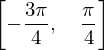

In [81]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

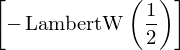

In [82]:
sympy.solve(sympy.exp(x) + 2 * x, x)

#### not solvable algebraically equations

In [83]:
sympy.solve(sympy.tan(x) + x, x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation x + tan(x)

In [84]:
sympy.solve(x**5 - x**2 + 1, x)

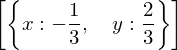

In [85]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1
sympy.solve([eq1, eq2], [x, y],dict=True)

#### Page 85